In [3]:
import pandas as pd
import numpy as np

# General csv file with results per iteration
df_log = pd.read_csv('results/without_deck_masks/0_log.csv')
df_iu_cls = pd.read_csv('results/without_deck_masks/0_iu_cls.csv')


In [9]:

deck_masked = df_iu_cls[['train_total/iu_cls','valid/iu_cls', 'epoch']].iloc[0:101]
deck_non_masked = df_iu_cls[['train_total/iu_cls','valid/iu_cls', 'epoch']].iloc[101:]


In [10]:
df_iu = pd.DataFrame()
headers = ['non-damage', 'delamination', 'rebar-exposure']
headers2 = [x+t for t in ('_train',) for x in headers]
df = pd.DataFrame.from_records(deck_masked['valid/iu_cls'].map(lambda x: x[1:-1].split()[:-1]).tolist(), columns=headers).astype('float32')
df2 = pd.DataFrame.from_records(deck_masked['train_total/iu_cls'].map(lambda x: x[1:-1].split()[:-1]).tolist(), columns=headers2).astype('float32')
df = pd.concat([df, df2], axis=1)

df_non_masked = pd.DataFrame.from_records(deck_non_masked['valid/iu_cls'].map(lambda x: x[1:-1].split()).tolist(), columns=headers).astype('float32')
df2_non_masked = pd.DataFrame.from_records(deck_non_masked['train_total/iu_cls'].map(lambda x: x[1:-1].split()).tolist(), columns=headers2).astype('float32')
df_non_masked = pd.concat([df_non_masked, df2_non_masked], axis=1)




highest IoU delamination
non-damage              0.940818
delamination            0.389479
rebar-exposure          0.283139
non-damage_train        0.967970
delamination_train      0.673469
rebar-exposure_train    0.449023
Name: 90, dtype: float32
highest IoU rebar-exposure
0.288221
non-damage              0.941817
delamination            0.356898
rebar-exposure          0.288221
non-damage_train        0.967585
delamination_train      0.648727
rebar-exposure_train    0.431384
Name: 92, dtype: float32
0.5366666666666667
     non-damage  delamination  rebar-exposure  non-damage_train  \
0      0.929895      0.000000        0.000000          0.915205   
1      0.900238      0.279686        0.000000          0.895250   
2      0.932016      0.282918        0.000000          0.927458   
3      0.921840      0.322331        0.000000          0.920281   
4      0.932645      0.309929        0.000000          0.932317   
5      0.881509      0.293494        0.000000          0.902960   
6    

/home/dokutagero/Envs/fcnchainer/lib/python3.6/site-packages/ipykernel_launcher.py:14: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  
/home/dokutagero/Envs/fcnchainer/lib/python3.6/site-packages/ipykernel_launcher.py:17: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.


Populating the interactive namespace from numpy and matplotlib
Best delamination/rebar-exposure mean for non masked: 0.2987496852874756
Corresponding epoch: 97
Best delamination/rebar-exposure mean for masked: 0.3363092541694641
Corresponding epoch: 90


/home/dokutagero/Envs/fcnchainer/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


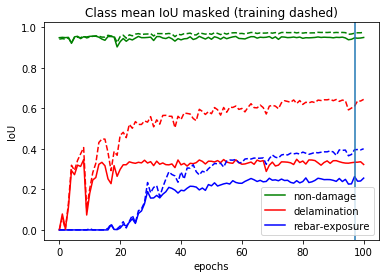

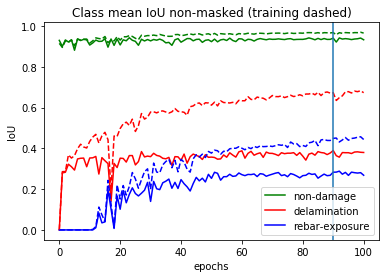

In [8]:
%pylab inline
%matplotlib inline
import matplotlib.pyplot as plt


labels = ['non-damage', 'delamination', 'rebar-exposure']
colors = [('green', 'darkgreen'), ('red', 'orange'), ('blue', 'darkblue')]
titles = ['masked', 'non-masked']

# Numpy representation of DataFrame
iu_cls_non_masked = df_non_masked.as_matrix()
iu_cls_masked = df.as_matrix()

print('Best delamination/rebar-exposure mean for non masked: {}'.format(df_non_masked[['delamination', 'rebar-exposure']].mean(axis=1).max()))
non_masked_best = df_non_masked[['delamination', 'rebar-exposure']].mean(axis=1).idxmax()
print('Corresponding epoch: {}'.format(non_masked_best))

print('Best delamination/rebar-exposure mean for masked: {}'.format(df[['delamination', 'rebar-exposure']].mean(axis=1).max()))
masked_best = df[['delamination', 'rebar-exposure']].mean(axis=1).idxmax()
print('Corresponding epoch: {}'.format(masked_best))
epoch_best_accs = [non_masked_best, masked_best]

for iu_cls_total, epoch_best_acc, title in zip((iu_cls_non_masked, iu_cls_masked), epoch_best_accs, titles):
    plt.figure()
    plt.xlabel('epochs')
    plt.ylabel('IoU')
    for values, label, color in zip((iu_cls_total[:,0], iu_cls_total[:,1], iu_cls_total[:,2]), labels, colors):
    #for values, label in zip((iu_cls[:,0:3]), labels):
        plt.plot(range(iu_cls_total.shape[0]), values, color=color[0], label=label)

    for values, label, color in zip((iu_cls_total[:,3], iu_cls_total[:,4], iu_cls_total[:,5]), labels, colors):
    #for values, label in zip((iu_cls[:,0:3]), labels):
        plt.plot(range(iu_cls_total.shape[0]), values, '--', color=color[0])
    
    plt.axvline(x=epoch_best_acc)

    plt.title('Class mean IoU {} (training dashed)'.format(title))
    plt.legend()
    plt.show()


In [8]:
print('Deck masked values: ')
print(df[['delamination', 'rebar-exposure']].mean(axis=1).max())
print(df[['delamination', 'rebar-exposure']].mean(axis=1).argmax())

print('Deck non-masked values: ')
print(df_non_masked[['delamination', 'rebar-exposure']].mean(axis=1).max())
print(df_non_masked[['delamination', 'rebar-exposure']].mean(axis=1).argmax())

print(df.iloc[90])
print(df_non_masked.iloc[97])

print(df_non_masked[['delamination', 'rebar-exposure']].mean(axis=1))

print(df_non_masked['delamination'].max())

Deck masked values: 
0.336309
90
Deck non-masked values: 
0.29875
97
non-damage              0.940818
delamination            0.389479
rebar-exposure          0.283139
non-damage_train        0.967970
delamination_train      0.673469
rebar-exposure_train    0.449023
Name: 90, dtype: float32
non-damage              0.948524
delamination            0.334015
rebar-exposure          0.263484
non-damage_train        0.971469
delamination_train      0.611238
rebar-exposure_train    0.396153
Name: 97, dtype: float32
0      0.000000
1      0.039340
2      0.003370
3      0.055898
4      0.146598
5      0.136446
6      0.160007
7      0.156786
8      0.173595
9      0.036843
10     0.090273
11     0.123317
12     0.129435
13     0.162043
14     0.166896
15     0.158496
16     0.126151
17     0.126737
18     0.159976
19     0.133089
20     0.154092
21     0.174263
22     0.170541
23     0.186930
24     0.193384
25     0.180593
26     0.207705
27     0.212372
28     0.236772
29     0.260125
     

/home/dokutagero/Envs/fcnchainer/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/dokutagero/Envs/fcnchainer/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  import sys
